# CUSTOMER PERSONALITY ANALYSIS
# -------------------------------------------------------------------------------------------------------------

IMPORTING BASIC LIBRARIES

In [43]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

IMPORTING DATASET

In [44]:
orginal_data = pd.read_excel("marketing_campaign1.xlsx")
data=orginal_data.copy()

DATA FEATURES

In [45]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [46]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


NUMBER OF ROWS AND COLUMNS

In [47]:
data.shape

(2240, 29)

COLUMNS

In [48]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [50]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [51]:
# CORRELATION BETWEEN FEATURES
data.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


CHECKING NULL VALUES

In [52]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<AxesSubplot:>

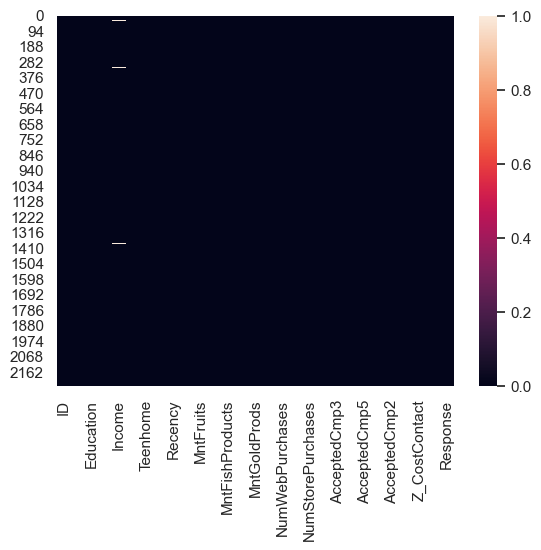

In [53]:
# SHOWS THE NULLVALUES IN VARIABLE
sns.heatmap(data.isnull())

FILLING NULL VALUES

In [54]:
# REPLACING THE NULLVALUES WITH MEAN OF THAT VARIABLE
data['Income'] = data['Income'].fillna(data['Income'].mean())
data.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

CHECKING FOR DUPLICATED VALUES

In [55]:
data.duplicated().sum()

0

In [56]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

# FEATURE ENGINEERING

In [57]:
# REPLACING MARITIAL_STATUS(MARRIED,TOGETHER==> RELATIONSHIP  AND DIVORCED,WIDOW,ALONE,YOLO,ABSURD==> SINGLE)
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],'relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

# REPLACING EDUCATION(BASIC,2ND CYCLE==> UG , GRADUATION==> GRADUATION AND PHD,MASTER==> PG)
data['Education']=data['Education'].replace(['Basic','2n Cycle'],'UG')
data['Education']=data['Education'].replace(['Graduation'],'graduation')
data['Education']=data['Education'].replace(['PhD','Master'],'PG')

# COMBINING KIDHOME AND TEENHOME AD CHILDREN
data["Children"]=data["Kidhome"]+data["Teenhome"]

# COMBINING AMOUNT ON WINES,FRUITS,MEATPRODUCTS,FISHPRODUCTS,SWEETPRODUCTS AND GOLD PRODUCTS AS TOTAL_EXPENSES
data['Total_Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

# COMBINING 1ST,2ND,3RD,4TH,5TH ACCEPTED CAMPAIGN AS TOTAL_ACCEPTEDCAMPAIGN
data['Total_AcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

# COMBINING DIFFERENT PURCHASE MODES AS TOTAL_NUMBER PURCHASES
data['Total_NumPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

# CONVERTING ENROLLMENT DATE TO NUMBER OS MONTHS SINCE ENROLLED
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Months_Customer'] = 12.0 * (2023 - data.Dt_Customer.dt.year ) + (1 - data.Dt_Customer.dt.month)

# ADDING AGE COLUMN BY CONSIDERING YEAR OF BIRTH AS REFERENCE
data['age']=datetime.datetime.now().year-data['Year_Birth']
# POPOING AGE FEATURE TO COLUMN{0}
Age = data.pop('age')
data.insert(0, 'age', Age)

# ENCODING AGE BY GIVE LABELS
bins = [0, 40, 60, 130]
labels = ['Young Adult', 'Mid Age Adult', 'senior Adult']
data['AgeGroup'] = pd.cut(data['age'], bins=bins, labels=labels)

data

,age,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Complain,Z_CostContact,Z_Revenue,Response,Children,Total_Expenses,Total_AcceptedCmp,Total_NumPurchases,Months_Customer,AgeGroup
0,66,5524,1957,graduation,Single,58138.0,0,0,2012-09-04,58,...,0,3,11,1,0,1617,1,25,124.0,senior Adult
1,69,2174,1954,graduation,Single,46344.0,1,1,2014-03-08,38,...,0,3,11,0,2,27,0,6,106.0,senior Adult
2,58,4141,1965,graduation,relationship,71613.0,0,0,2013-08-21,26,...,0,3,11,0,0,776,0,21,113.0,Mid Age Adult
3,39,6182,1984,graduation,relationship,26646.0,1,0,2014-02-10,26,...,0,3,11,0,1,53,0,8,107.0,Young Adult
4,42,5324,1981,PG,relationship,58293.0,1,0,2014-01-19,94,...,0,3,11,0,1,422,0,19,108.0,Mid Age Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,56,10870,1967,graduation,relationship,61223.0,0,1,2013-06-13,46,...,0,3,11,0,1,1341,0,18,115.0,Mid Age Adult
2236,77,4001,1946,PG,relationship,64014.0,2,1,2014-06-10,56,...,0,3,11,0,3,444,1,22,103.0,senior Adult
2237,42,7270,1981,graduation,Single,56981.0,0,0,2014-01-25,91,...,0,3,11,0,0,1241,1,19,108.0,Mid Age Adult
2238,67,8235,1956,PG,relationship,69245.0,0,1,2014-01-24,8,...,0,3,11,0,1,843,0,23,108.0,senior Adult


DROPPING REDUNDANT FEATURES

In [58]:
columns_todrop=['ID','Year_Birth','Dt_Customer','Z_CostContact','Z_Revenue','Kidhome','Teenhome',"age"]
Data=data.drop(columns_todrop,axis=1)
Data

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Total_Expenses,Total_AcceptedCmp,Total_NumPurchases,Months_Customer,AgeGroup
0,graduation,Single,58138.0,58,635,88,546,172,88,88,...,0,0,0,1,0,1617,1,25,124.0,senior Adult
1,graduation,Single,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,2,27,0,6,106.0,senior Adult
2,graduation,relationship,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,776,0,21,113.0,Mid Age Adult
3,graduation,relationship,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,1,53,0,8,107.0,Young Adult
4,PG,relationship,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,1,422,0,19,108.0,Mid Age Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,graduation,relationship,61223.0,46,709,43,182,42,118,247,...,0,0,0,0,1,1341,0,18,115.0,Mid Age Adult
2236,PG,relationship,64014.0,56,406,0,30,0,0,8,...,1,0,0,0,3,444,1,22,103.0,senior Adult
2237,graduation,Single,56981.0,91,908,48,217,32,12,24,...,0,0,0,0,0,1241,1,19,108.0,Mid Age Adult
2238,PG,relationship,69245.0,8,428,30,214,80,30,61,...,0,0,0,0,1,843,0,23,108.0,senior Adult


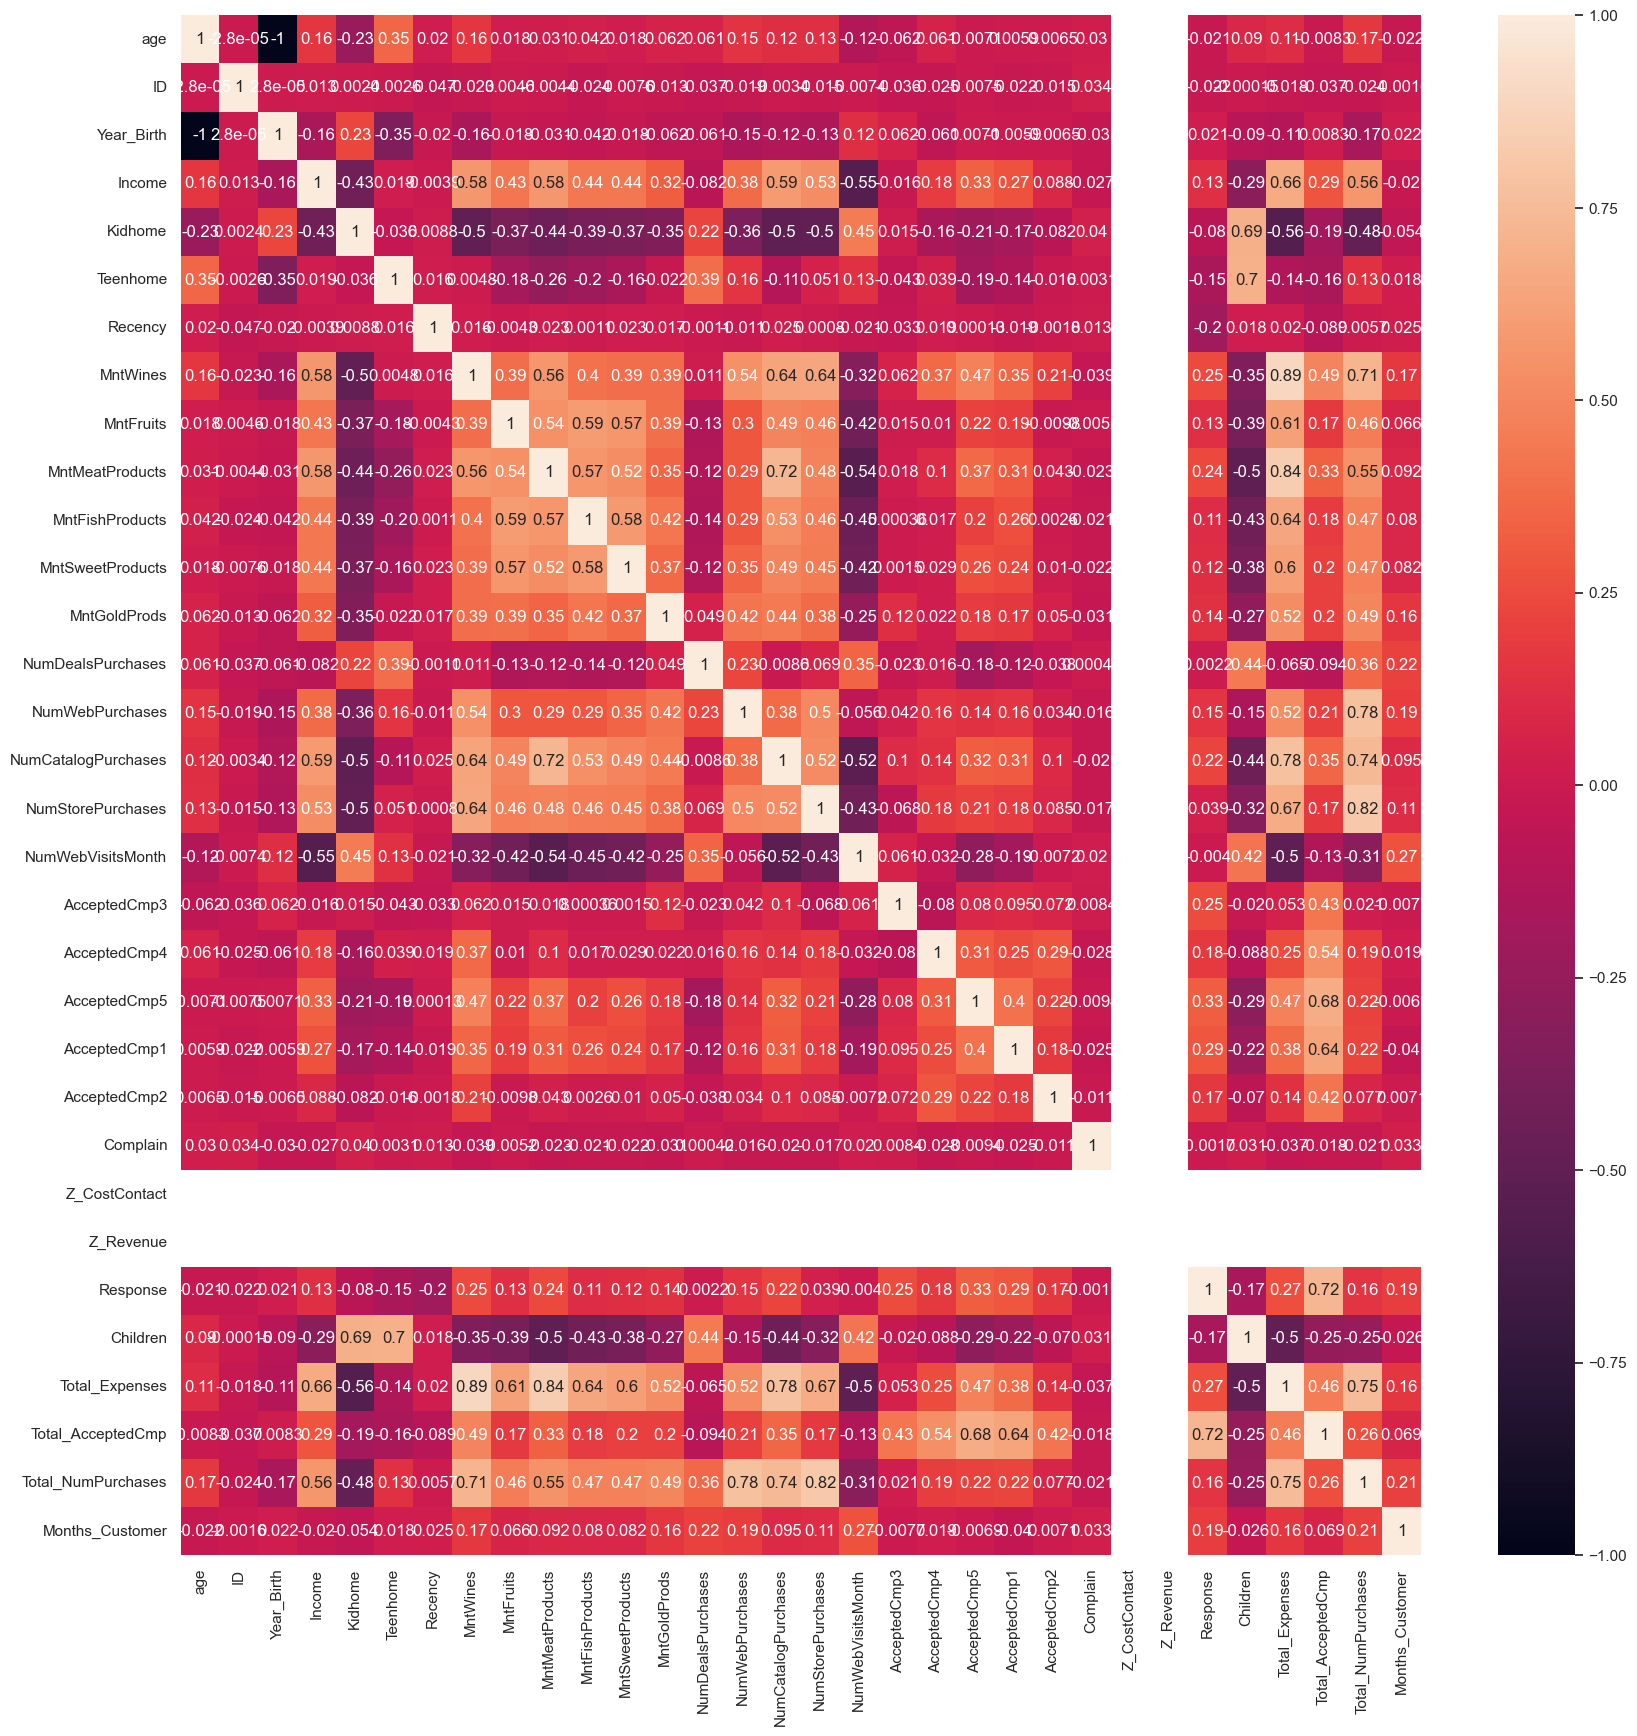

In [59]:
# CORRELATION HEATMAP
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

# DATA CLEANING
# HANDLING OUTLIERS

BOXPLOTTING OF SOME IMPORTANT FEATURES

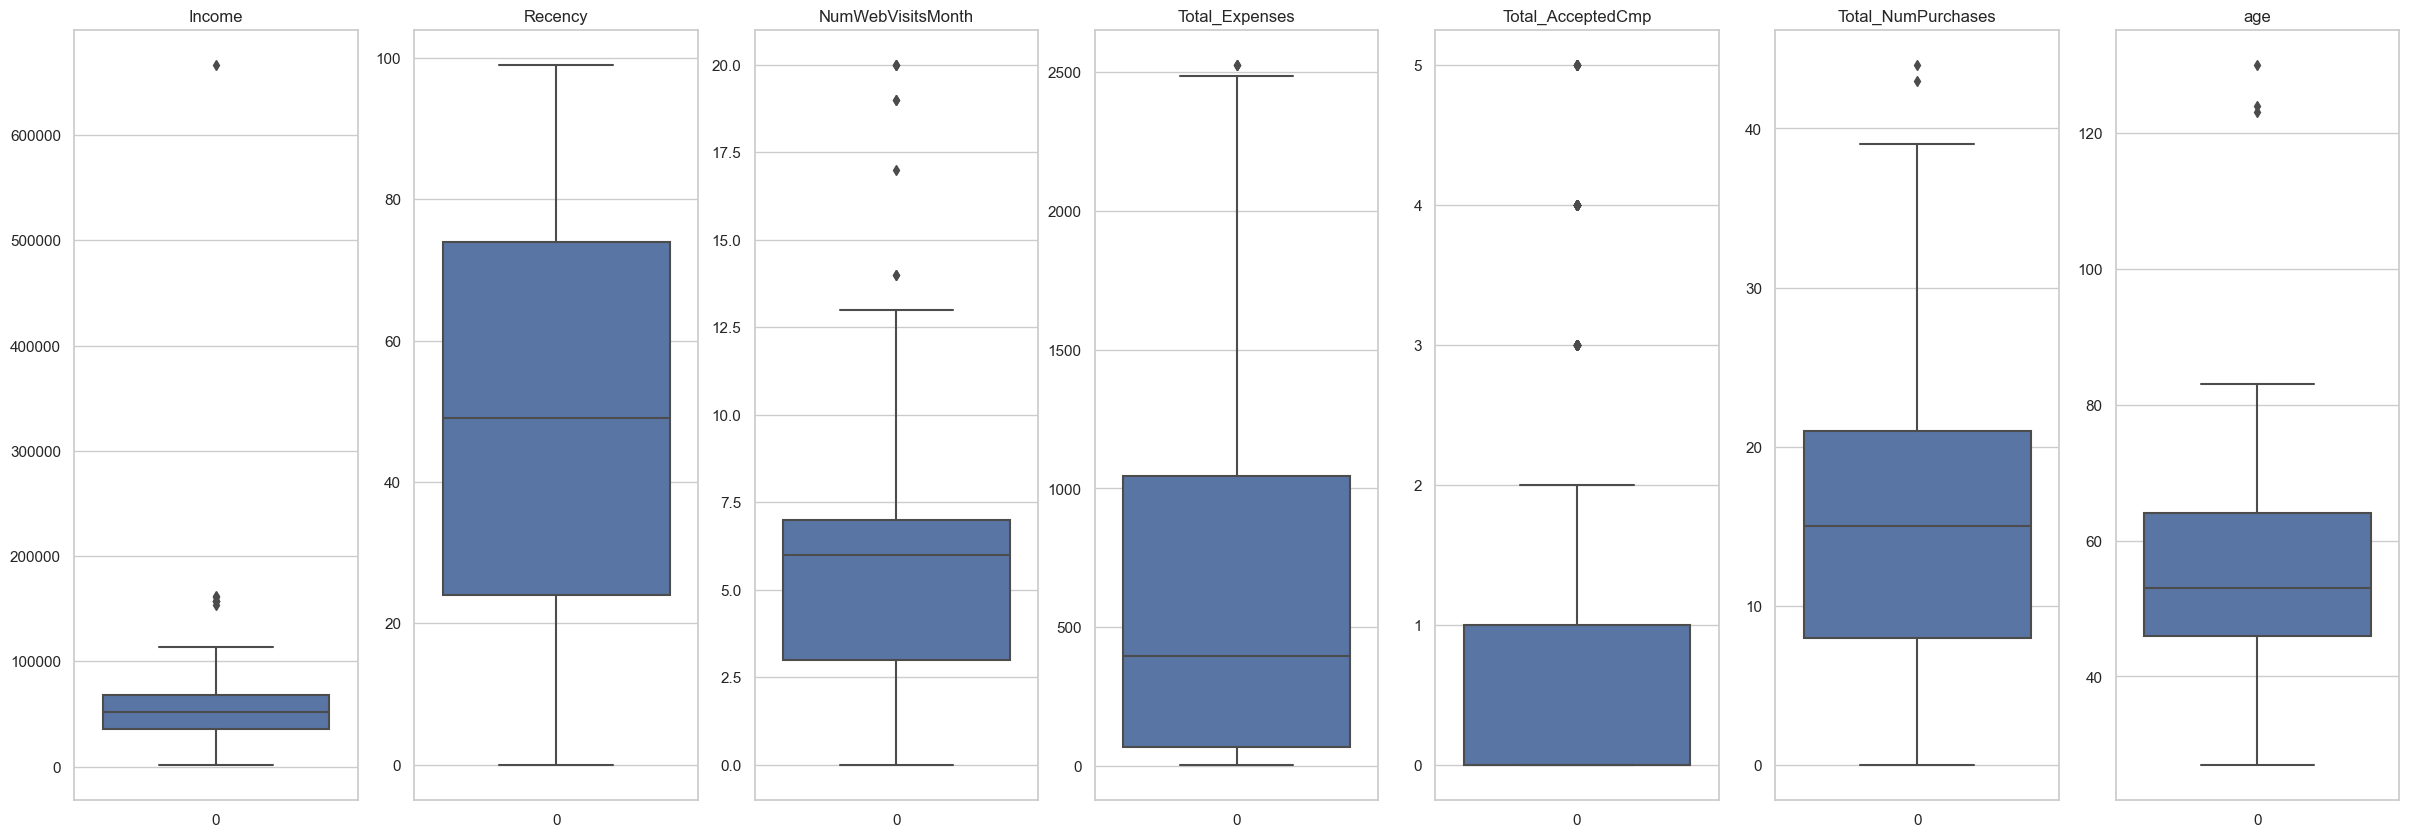

In [60]:
num_cols = ['Income', 'Recency', 'NumWebVisitsMonth', 'Total_Expenses', 'Total_AcceptedCmp', 'Total_NumPurchases','age']

fig,axs = plt.subplots(ncols=len(num_cols), figsize=(30,10))

for i, col in enumerate(num_cols):
    sns.boxplot(data=data[col], ax=axs[i])
    axs[i].set_title(col)

In [61]:
# CHECKING OUTLIERS
for i in Data:
    if data[i].dtype == 'int64' or data[i].dtype == 'float64':
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 - Q1
        upQuartile = Q3 + 1.5*IQR
        lowQuartile = Q1 - 1.5*IQR

        if data[(data[i] > upQuartile) | (data[i] < lowQuartile)].any(axis=None):
            print(i,"--->yes contains outliers")
        else:
            print(i, "--->no doesn't contain outliers")

Income --->yes contains outliers
Recency --->no doesn't contain outliers
MntWines --->yes contains outliers
MntFruits --->yes contains outliers
MntMeatProducts --->yes contains outliers
MntFishProducts --->yes contains outliers
MntSweetProducts --->yes contains outliers
MntGoldProds --->yes contains outliers
NumDealsPurchases --->yes contains outliers
NumWebPurchases --->yes contains outliers
NumCatalogPurchases --->yes contains outliers
NumStorePurchases --->no doesn't contain outliers
NumWebVisitsMonth --->yes contains outliers
AcceptedCmp3 --->yes contains outliers
AcceptedCmp4 --->yes contains outliers
AcceptedCmp5 --->yes contains outliers
AcceptedCmp1 --->yes contains outliers
AcceptedCmp2 --->yes contains outliers
Complain --->yes contains outliers
Response --->yes contains outliers
Children --->yes contains outliers
Total_Expenses --->yes contains outliers
Total_AcceptedCmp --->yes contains outliers
Total_NumPurchases --->yes contains outliers
Months_Customer --->no doesn't con

In [62]:
# DROPPING OUTLIERS
cols = ['Income', 'Recency', 'Total_NumPurchases', 'Total_Expenses', 'age','Complain','Children']

for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    data.loc[data[col] > up_lim, col] = up_lim
    data.loc[data[col] < low_lim, col] = low_lim

# EXPLORATORY DATA ANALYSIS
# DATA VISUALISATION

In [63]:
Data

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Total_Expenses,Total_AcceptedCmp,Total_NumPurchases,Months_Customer,AgeGroup
0,graduation,Single,58138.0,58,635,88,546,172,88,88,...,0,0,0,1,0,1617,1,25,124.0,senior Adult
1,graduation,Single,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,2,27,0,6,106.0,senior Adult
2,graduation,relationship,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,776,0,21,113.0,Mid Age Adult
3,graduation,relationship,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,1,53,0,8,107.0,Young Adult
4,PG,relationship,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,1,422,0,19,108.0,Mid Age Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,graduation,relationship,61223.0,46,709,43,182,42,118,247,...,0,0,0,0,1,1341,0,18,115.0,Mid Age Adult
2236,PG,relationship,64014.0,56,406,0,30,0,0,8,...,1,0,0,0,3,444,1,22,103.0,senior Adult
2237,graduation,Single,56981.0,91,908,48,217,32,12,24,...,0,0,0,0,0,1241,1,19,108.0,Mid Age Adult
2238,PG,relationship,69245.0,8,428,30,214,80,30,61,...,0,0,0,0,1,843,0,23,108.0,senior Adult


Text(0.5, 1.0, 'INCOME DISTRIBUTION')

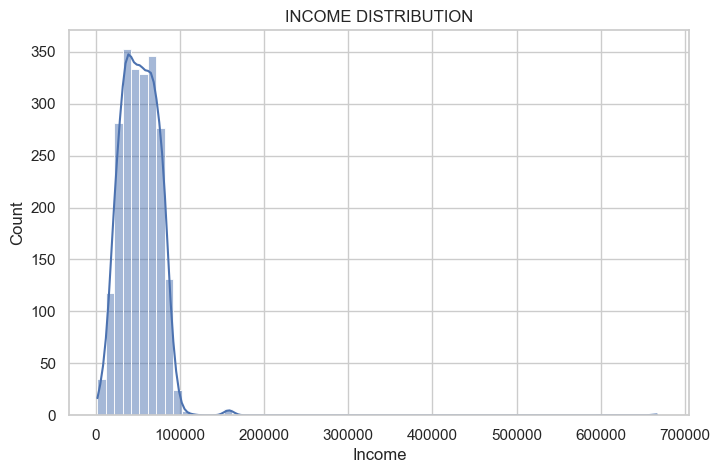

In [64]:
# INCOME DISTRIBUTION
plt.figure(figsize=(8,5), facecolor='white')
sns.set(style='whitegrid')
ax = sns.histplot(data=Data, x='Income', binwidth=10000, kde=True)
ax.set_title('INCOME DISTRIBUTION')

In [65]:
# PIE CHART THAT DESCRIBES PERCENTAGE OF AGE GROUP IN DATA
fig =  px.pie (data, names = "AgeGroup", hole = 0.5, template ="gridon")
fig.show ()

In [66]:
# PIE CHART THAT DESCRIBES NUMBER OF MARRIED AND UNMARRIED COUPLES IN DATA
maritalstatus = Data.Marital_Status.value_counts()

fig = px.pie(maritalstatus, 
             values = maritalstatus.values, 
             names = maritalstatus.index,
             color_discrete_sequence=px.colors.sequential.RdBu_r)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 4)))
fig.show()  

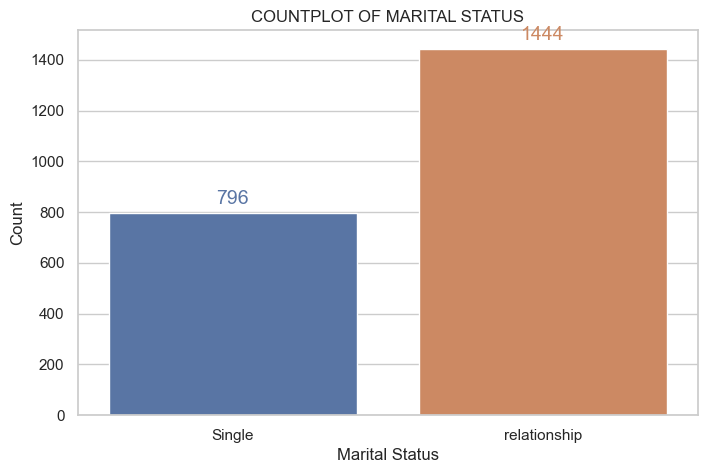

In [67]:
plt.figure(figsize=(8,5),facecolor='white')
ax = sns.countplot(data=Data, x='Marital_Status')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('COUNTPLOT OF MARITAL STATUS')
plt.show()

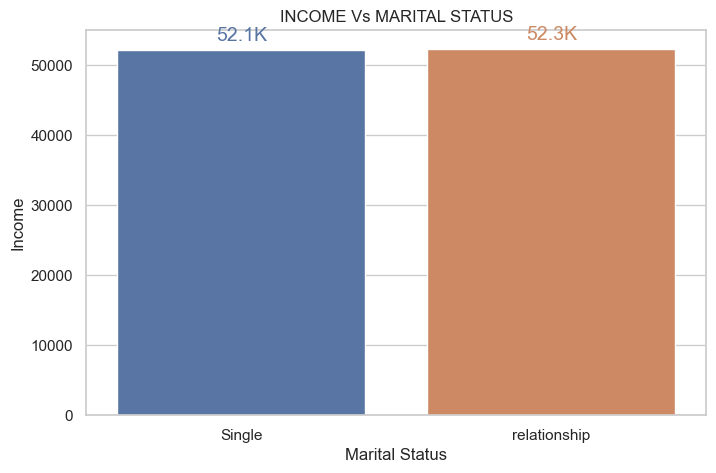

In [68]:
plt.figure(figsize=(8,5),facecolor='white')
ax=sns.barplot(data=Data, x='Marital_Status', y='Income',ci=None)
for p in ax.patches:
    ax.annotate('{:.1f}K'.format(p.get_height()/ 1000), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', xytext = (0, 10), 
            textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.title('INCOME Vs MARITAL STATUS')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.show()

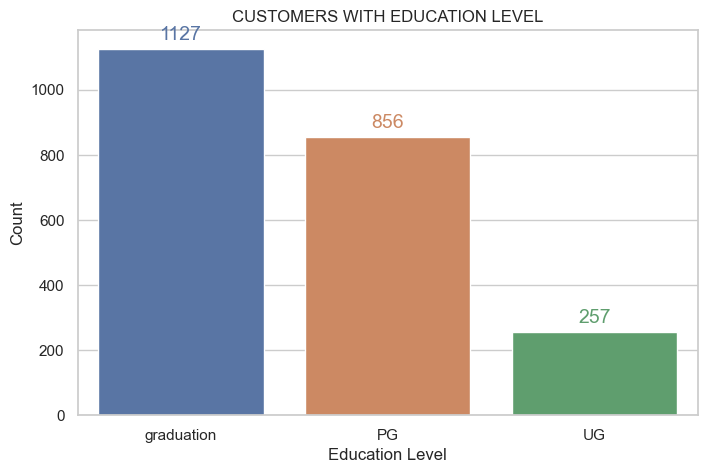

In [69]:

plt.figure(figsize=(8,5),facecolor='white')
ax = sns.countplot(data=Data, x='Education')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
    
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('CUSTOMERS WITH EDUCATION LEVEL')
plt.show()

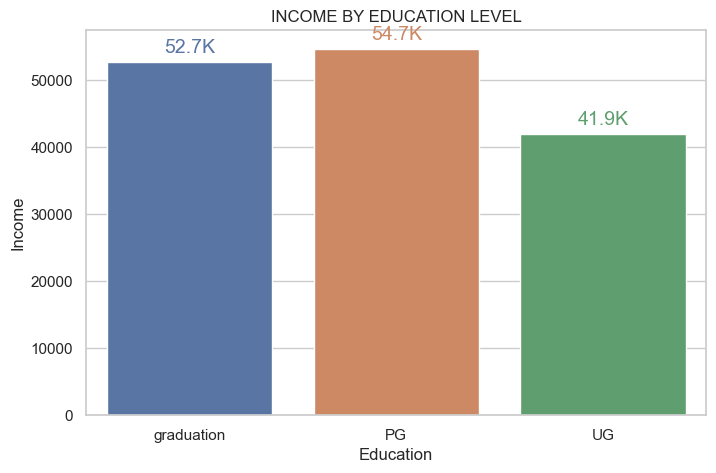

In [70]:
plt.figure(figsize=(8,5),facecolor='white')
ax=sns.barplot(data=Data, x='Education', y='Income', ci=None)
for p in ax.patches:
    ax.annotate('{:.1f}K'.format(p.get_height()/ 1000), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', xytext = (0, 10), 
            textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.title('INCOME BY EDUCATION LEVEL')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

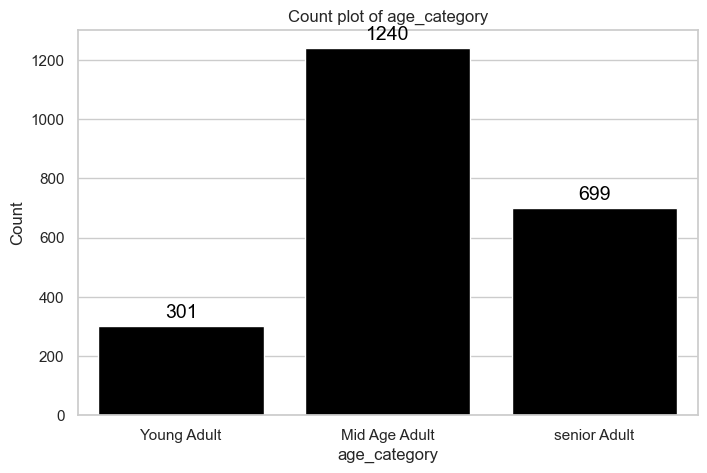

In [71]:
plt.figure(figsize=(8,5),facecolor='white')
ax = sns.countplot(data=Data, x='AgeGroup',color='black')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())

plt.xlabel('age_category')
plt.ylabel('Count')
plt.title('Count plot of age_category')

plt.show()

# AMOUNT SPENT ON PRODUCTS

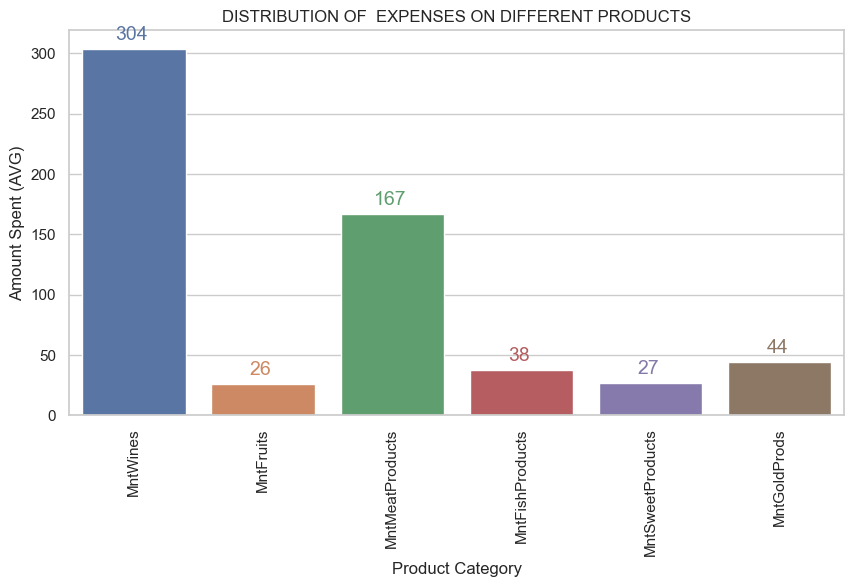

In [72]:

plt.figure(figsize=(10,5),facecolor='white')
products =['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
ax = sns.barplot(data=Data[products],ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2.1, p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14, color=p.get_facecolor())
plt.xticks(rotation=90)
plt.xlabel('Product Category')
plt.ylabel('Amount Spent (AVG)')
plt.title('DISTRIBUTION OF  EXPENSES ON DIFFERENT PRODUCTS')
plt.show()

# PROMOTIONAL CAMPAIGN ACCEPTED BY CUSTOMERS

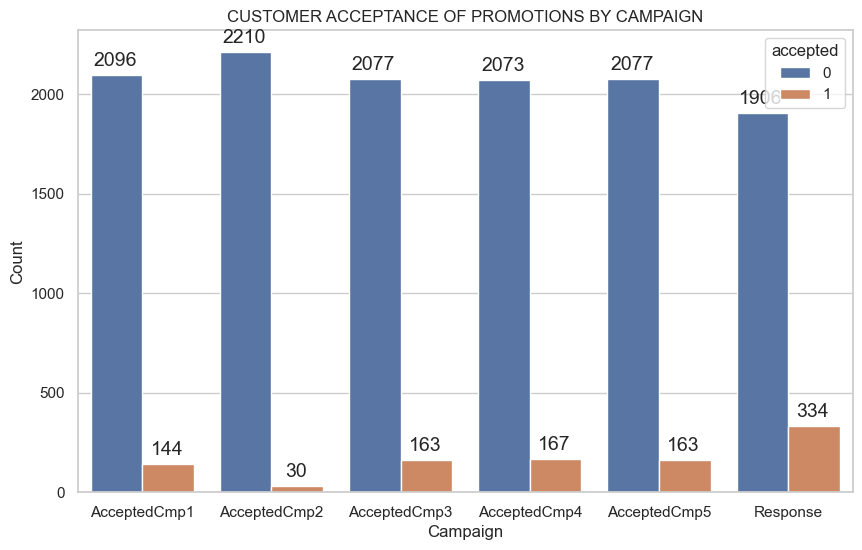

In [73]:
# Create a subset of the DataFrame with the desired columns
promo_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']

# Reshape the data into a long format
promo_data = pd.melt(Data[promo_cols], var_name='campaign', value_name='accepted')

fig = plt.figure(figsize=(10, 6),facecolor ='white')
ax = sns.countplot(x='campaign', hue='accepted', data=promo_data)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2.1, p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points', fontsize=14)

plt.xlabel('Campaign')
plt.ylabel('Count')
plt.title('CUSTOMER ACCEPTANCE OF PROMOTIONS BY CAMPAIGN')
plt.show()

In [74]:
# NUMBER OF CUSTOMERS WITH 0,1,2,3 CHILDREN.
Data.Children.value_counts()

1    1128
0     638
2     421
3      53
Name: Children, dtype: int64

In [75]:
# NUMBER OF CUSTOMERS WITH DIFFERENT AGE GROUPS
Data.AgeGroup.value_counts()

Mid Age Adult    1240
senior Adult      699
Young Adult       301
Name: AgeGroup, dtype: int64

In [76]:
# NUMBER OF CUSTOMERS WITH DIFFERENT EDUCATION BACKGROUND
Data.Education.value_counts()

graduation    1127
PG             856
UG             257
Name: Education, dtype: int64

# DATA PREPROCESSING

In [77]:
data

,age,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Complain,Z_CostContact,Z_Revenue,Response,Children,Total_Expenses,Total_AcceptedCmp,Total_NumPurchases,Months_Customer,AgeGroup
0,66,5524,1957,graduation,Single,58138.0,0,0,2012-09-04,58,...,0,3,11,1,0.0,1617.0,1,25.0,124.0,senior Adult
1,69,2174,1954,graduation,Single,46344.0,1,1,2014-03-08,38,...,0,3,11,0,2.0,27.0,0,6.0,106.0,senior Adult
2,58,4141,1965,graduation,relationship,71613.0,0,0,2013-08-21,26,...,0,3,11,0,0.0,776.0,0,21.0,113.0,Mid Age Adult
3,39,6182,1984,graduation,relationship,26646.0,1,0,2014-02-10,26,...,0,3,11,0,1.0,53.0,0,8.0,107.0,Young Adult
4,42,5324,1981,PG,relationship,58293.0,1,0,2014-01-19,94,...,0,3,11,0,1.0,422.0,0,19.0,108.0,Mid Age Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,56,10870,1967,graduation,relationship,61223.0,0,1,2013-06-13,46,...,0,3,11,0,1.0,1341.0,0,18.0,115.0,Mid Age Adult
2236,77,4001,1946,PG,relationship,64014.0,2,1,2014-06-10,56,...,0,3,11,0,2.5,444.0,1,22.0,103.0,senior Adult
2237,42,7270,1981,graduation,Single,56981.0,0,0,2014-01-25,91,...,0,3,11,0,0.0,1241.0,1,19.0,108.0,Mid Age Adult
2238,67,8235,1956,PG,relationship,69245.0,0,1,2014-01-24,8,...,0,3,11,0,1.0,843.0,0,23.0,108.0,senior Adult


In [78]:
# ENCODING RELATIONSHIP AS "O" AND SINGLE AS "1"
data['Marital_Status']=data.Marital_Status.replace(['relationship'],"0")
data['Marital_Status']=data.Marital_Status.replace(['Single'],"1")

In [79]:
dropping_col=(["ID","Year_Birth",'Education','Kidhome','Teenhome','Dt_Customer','MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Months_Customer','AgeGroup'])
x=data.drop(dropping_col,axis=1)

In [80]:
# FEATURES SELECTED FOR MODELBUILDING
x.columns

Index(['age', 'Marital_Status', 'Income', 'Recency', 'Children',
       'Total_Expenses', 'Total_AcceptedCmp', 'Total_NumPurchases'],
      dtype='object')

In [81]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 2240 non-null   int64  
 1   Marital_Status      2240 non-null   object 
 2   Income              2240 non-null   float64
 3   Recency             2240 non-null   int64  
 4   Children            2240 non-null   float64
 5   Total_Expenses      2240 non-null   float64
 6   Total_AcceptedCmp   2240 non-null   int64  
 7   Total_NumPurchases  2240 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 140.1+ KB


In [82]:
x.describe()

,age,Income,Recency,Children,Total_Expenses,Total_AcceptedCmp,Total_NumPurchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,54.147768,51875.150461,49.109375,0.938616,605.779408,0.446875,14.859375
std,11.771725,20936.079938,28.962453,0.722821,602.189559,0.890543,7.667679
min,27.000000,1730.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,46.000000,35538.750000,24.000000,0.000000,68.750000,0.000000,8.000000
50%,53.000000,51741.500000,49.000000,1.000000,396.000000,0.000000,15.000000
75%,64.000000,68289.750000,74.000000,1.000000,1045.500000,1.000000,21.000000
max,91.000000,117416.250000,99.000000,2.500000,2510.625000,5.000000,40.500000


In [84]:
# STANDARDIZING THE DATA BEFORE MODEL MAKING
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(x)

# ELBOW CURVE PLOTTING

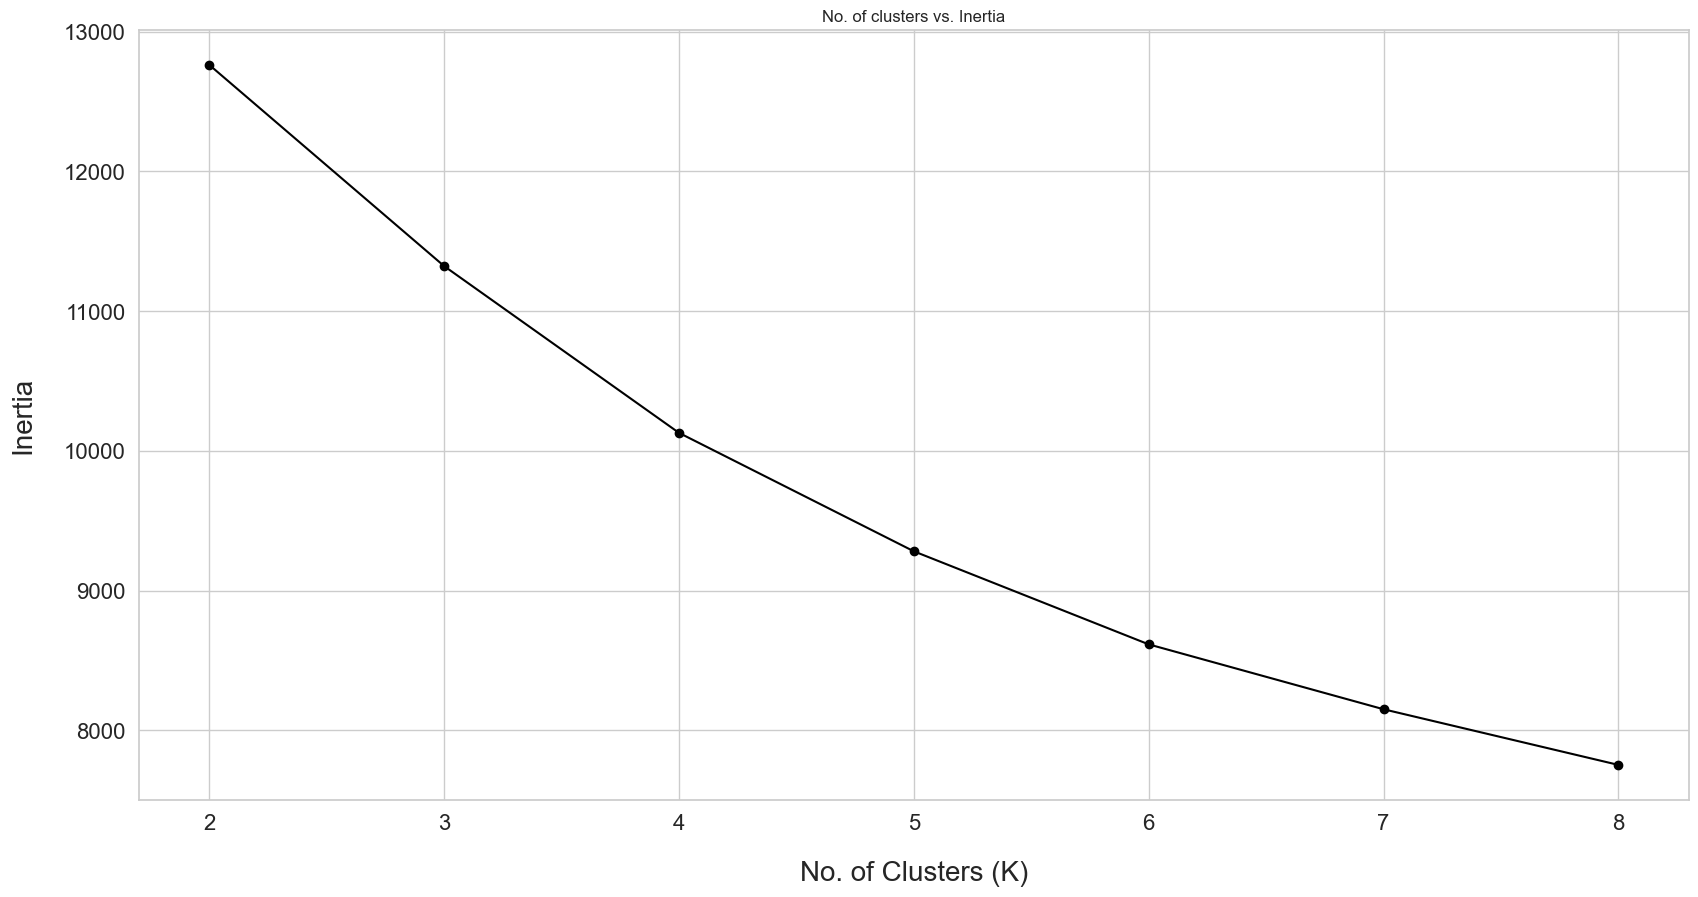

In [85]:
from sklearn.cluster import KMeans

options = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(20,10))    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o', color = 'black')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20);

In [86]:
from sklearn.metrics import silhouette_score 

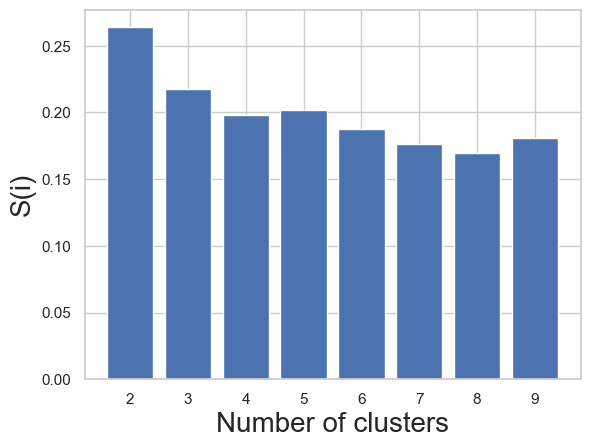

In [87]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, m1.fit_predict(X))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

# MODEL BUILDING

In [88]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

preds = model.fit_predict(X)

Data["clusters"]=preds

In [89]:
# GROUPING THE CUSTOMERS BY CLUSTERS AVERAGE
Data.groupby("clusters").mean()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Total_Expenses,Total_AcceptedCmp,Total_NumPurchases,Months_Customer
clusters,,,,,,,,,,,,,,,,,,,,,
0,37651.197802,48.300000,79.364444,7.868889,36.628889,10.197778,7.308889,22.888889,2.437778,2.744444,...,0.000000,0.004444,0.000000,0.013333,0.137778,1.244444,164.257778,0.233333,9.733333,113.744444
1,68682.621301,51.460645,521.143226,48.464516,295.167742,69.069677,49.241290,70.619355,2.579355,5.883871,...,0.040000,0.042581,0.001290,0.009032,0.070968,0.690323,1053.705806,0.264516,21.787097,114.731613
2,77996.508823,43.233480,823.726872,56.696035,458.656388,80.317181,62.427313,76.638767,1.383260,5.766520,...,0.581498,0.480176,0.118943,0.004405,0.709251,0.224670,1558.462555,2.502203,20.881057,115.162996
3,37000.717019,48.951777,68.819797,6.276650,31.237310,9.780457,6.343909,20.535533,2.281726,2.596447,...,0.000000,0.000000,0.002538,0.008883,0.071066,1.247462,142.993655,0.156091,9.246193,113.645939


In [90]:
# NAMING THE CLUSTERS BASED ON CLUSTER DESCRIPTION
Data.clusters = Data.clusters.replace({3: 'less_spends',0: 'more_spends',1: 'extremely_spends',2: 'most_spends'})
Data['clusters'] = Data.clusters

INCOME Vs CLUSTERS

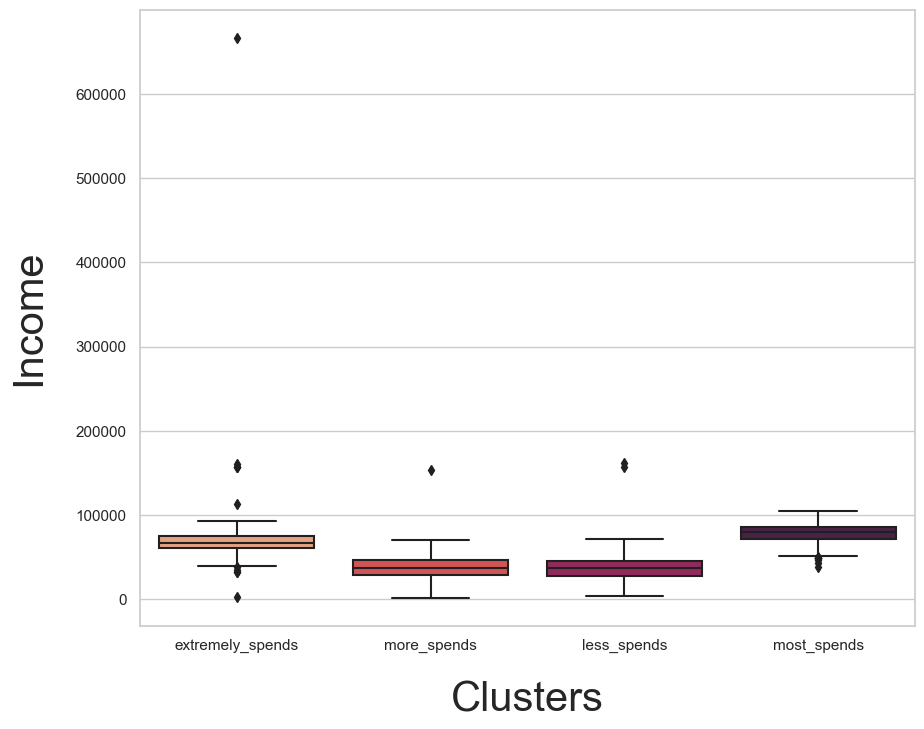

In [91]:
plt.figure(figsize=(10,8))

sns.boxplot(data=Data, x='clusters', y = 'Income',palette='rocket_r');
plt.xlabel('Clusters', fontsize=30, labelpad=20)
plt.ylabel('Income', fontsize=30, labelpad=20);

TOTAL EXPENSES Vs CLUSTERS

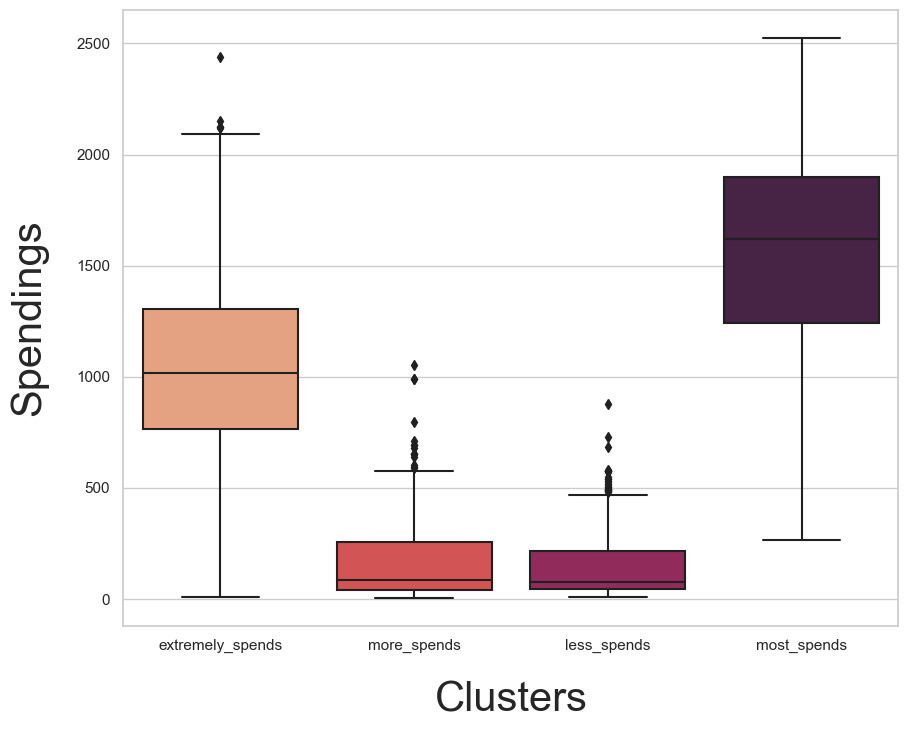

In [92]:
plt.figure(figsize=(10,8))

sns.boxplot(data=Data, x='clusters', y = 'Total_Expenses',palette='rocket_r');
plt.xlabel('Clusters', fontsize=30, labelpad=20)
plt.ylabel('Spendings', fontsize=30, labelpad=20);

PROMOTIONS ACCEPTANCE BY CLUSTERS

<Figure size 3000x1500 with 0 Axes>

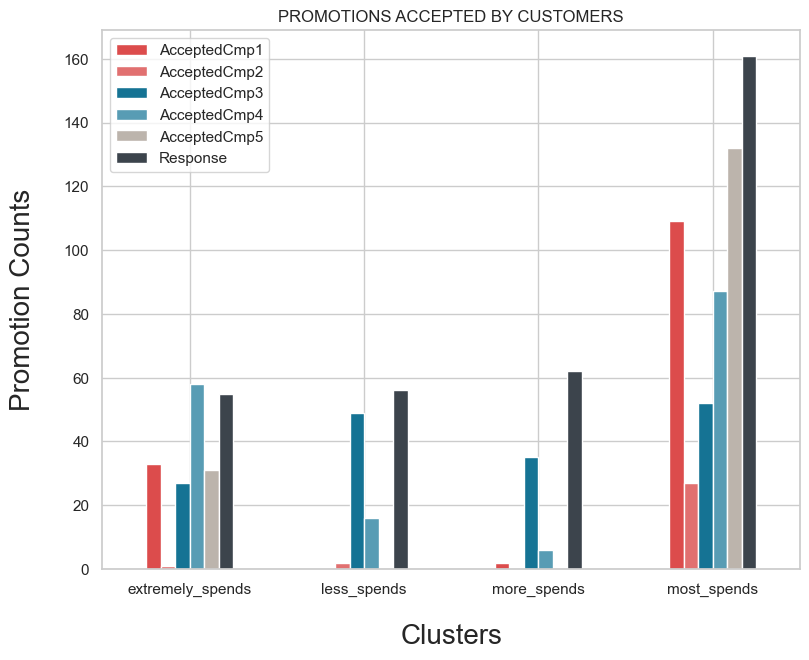

In [93]:
cluster_campaign = Data.groupby('clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                                  'AcceptedCmp5', 'Response']].sum()

plt.figure(figsize=(30,15))
cluster_campaign.plot(kind='bar', color=['#dc4c4c','#e17070','#157394','#589cb4','#bcb4ac','#3c444c'],figsize=(9,7))

plt.title('PROMOTIONS ACCEPTED BY CUSTOMERS')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Promotion Counts', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

PRODUCTS Vs CLUSTERS

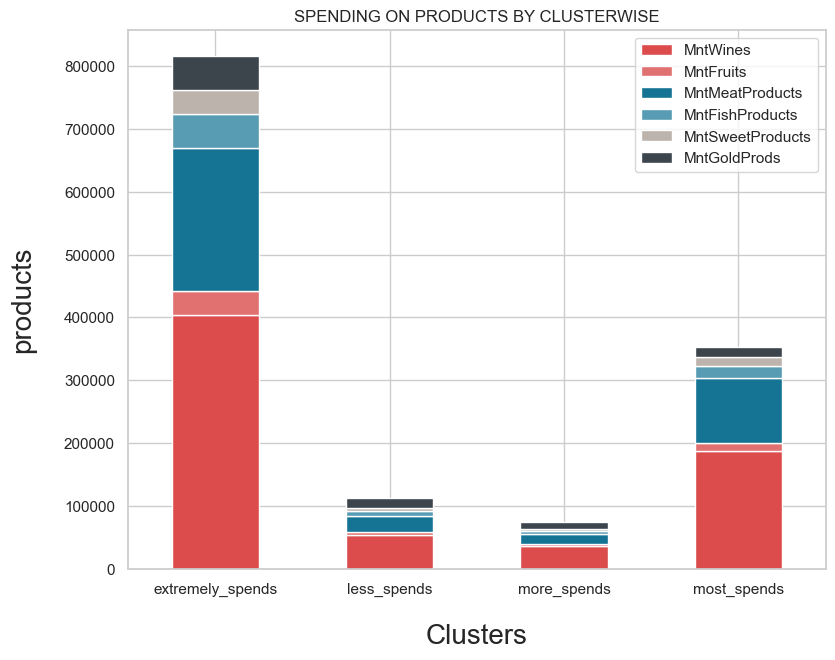

In [94]:
cluster_spendings = Data.groupby('clusters')[['MntWines', 'MntFruits','MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

cluster_spendings.plot(kind='bar', stacked=True, figsize=(9,7), color=['#dc4c4c','#e17070','#157394','#589cb4','#bcb4ac','#3c444c'])

plt.title('SPENDING ON PRODUCTS BY CLUSTERWISE')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('products', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

TOTAL NUMBER OF PURCHASES Vs CLUSTERS

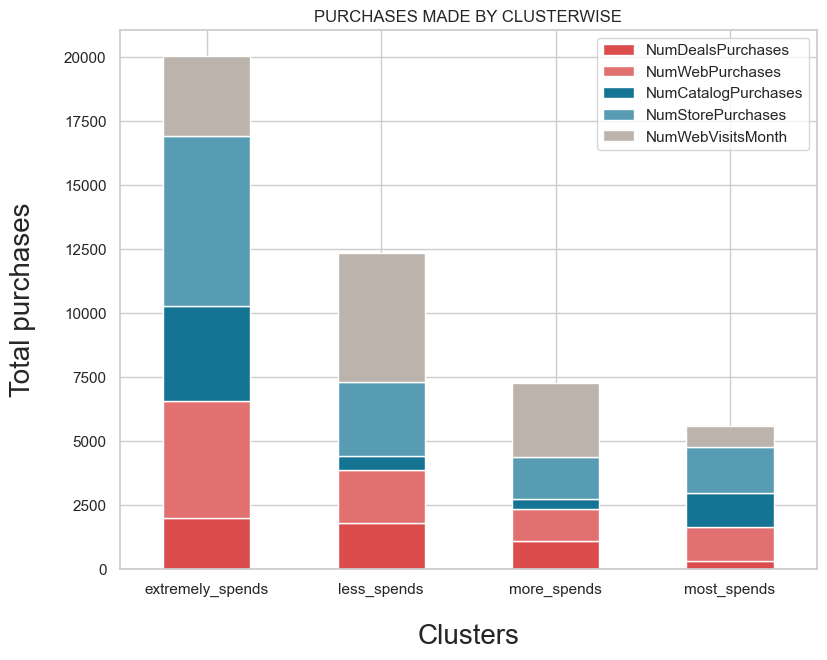

In [95]:
cluster_spendings = Data.groupby('clusters')[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].sum()

cluster_spendings.plot(kind='bar', stacked=True, figsize=(9,7), color=['#dc4c4c','#e17070','#157394','#589cb4','#bcb4ac','#3c444c'])

plt.title('PURCHASES MADE BY CLUSTERWISE')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Total purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

In [96]:
# PIE CHART OF PERCENTAGE OF CUSTOMERS  BASED ON CLUSTERS
cluster_counts = Data.clusters.value_counts()
fig = px.pie(cluster_counts, 
             values = cluster_counts.values, 
             names = cluster_counts.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

In [97]:
Data.clusters.value_counts()

less_spends         788
extremely_spends    775
more_spends         450
most_spends         227
Name: clusters, dtype: int64

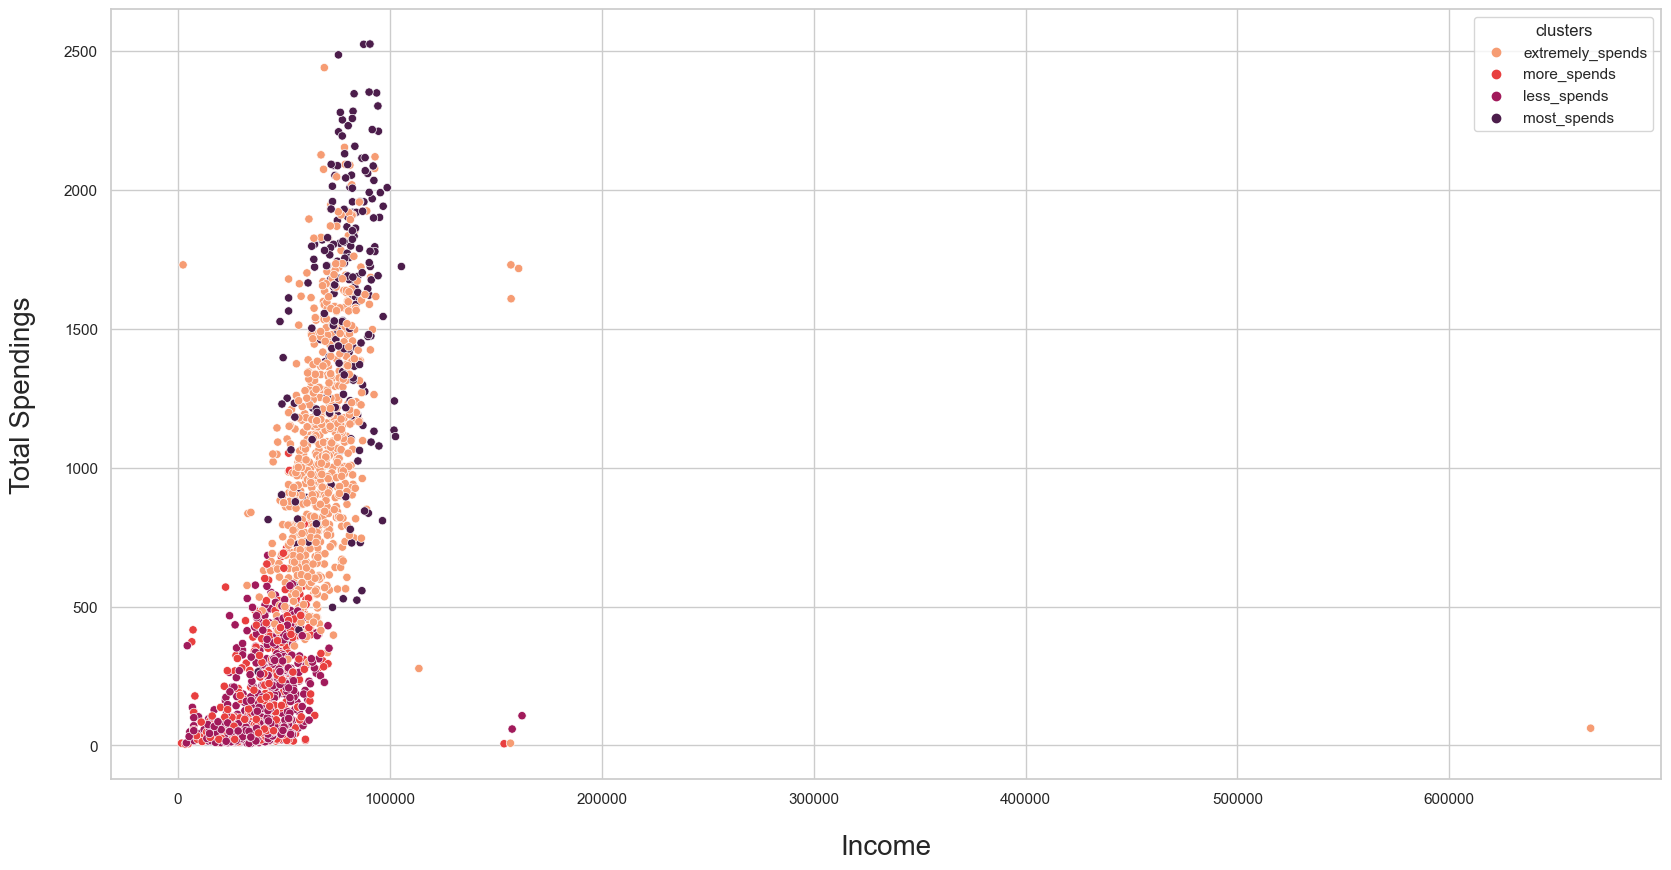

In [98]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Data, x='Income', y='Total_Expenses', hue='clusters', palette='rocket_r');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);